Aşağıdaki kod bloğunda mypgmwrite ve mypgmread fonksiyonları yer almaktadır.

In [1]:
def mypgmwrite(fileName, k, magicNumber, comment, width, height, intensity):
    maxVal = 2**k - 1
    with open(fileName, "wb") as file:
        file.write(magicNumber.encode() + b"\n")
        if comment:
            file.write(comment.encode() + b"\n")
        file.write(str(width).encode() + b" " + str(height).encode() + b"\n")
        file.write(str(maxVal).encode() + b"\n")
        file.write(intensity)

def mypgmread(fileName):
    with open(fileName, "rb") as file:
        header = file.readline().decode(encoding="ascii").strip()
        comment = file.readline().decode(encoding="ascii").strip()
        if header not in "P5":
            return print("The read file is not a binary encoded (P5 format) PGM file!")

        sizeInfo = file.readline().decode(encoding="ascii").strip()
        width, height = map(int, sizeInfo.split())

        maxVal = file.readline().decode(encoding="ascii").strip()
        kVal = int(mylog2(int(maxVal) + 1)) # Okunan maxVal değerini byte karşılığında ifade etme işlemi
        
        intensity = file.read()

        return kVal, header, comment, width, height, intensity

def mylog2(input):
    # Bu fonksiyon 2 tabanında logaritma alma işlemini gerçekleştirir, math kütüphanesini kullanmaktan kaçınmak maksadıyla oluşturuldu
    if input == 0:
        return 0
    elif input == 1:
        return 0
    elif input == 2:
        return 1
    else:
        return 1 + mylog2(input / 2)

Aşağıdaki kod bloğunda okunan bir dosyanın doğruca yazılması işlemi gerçekleştirilmektedir. Okunan bir dosyanın yazdırılarak hem okuma hem de yazma fonksiyonlarının test edilmesini sağlamak maksadıyla oluşturulmuştur.

In [2]:
def myReadAndWriteReceived(inputFile, outputFile):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile)
    mypgmwrite(outputFile, kVal, header, comment, width, height, receivedIntensity)

Aşağıdaki kod bloğu okunan bir görüntünün negatife dönüşümünü sağlamaktadır.

In [3]:
def myImageNegative(inputFile, outputFile):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile) # görüntü okunarak veriler çekilir

    # Negatife çevirme işlemi her pixelin değerinin azami pixel değerinden çıkarılmasıyla gerçekleştirilir:
    maxVal = 2**kVal - 1
    negativeIntensity = b""
    for pixel in receivedIntensity:
        negativePixel = maxVal - pixel
        negativeIntensity += bytes([negativePixel])

    mypgmwrite(outputFile, kVal, header, comment, width, height, negativeIntensity) # işlenen görüntü yazdırılır

Aşağıdaki kod bloğunda matplotlib kullanılarak görüntüyü çizdirme işlemi çeşitli layoutlarda gerçekleştirilir.

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def myPGMDisplay(pgmFile):
  image = mpimg.imread(pgmFile) # pgm dosyasını oku
  plt.imshow(image, cmap='gray') # görüntüyü gray map'leme ile göster
  plt.show()

""" İkili """

def myPGMDisplayDouble(pgmFile, pgmFileOther, title, titleOther, description):
  # Görüntüyü oku
  image = mpimg.imread(pgmFile)
  imageOther = mpimg.imread(pgmFileOther)

  # İki subplot'lu figure oluştur
  fig, axes = plt.subplots(1, 2)

  # İlk görüntüyü ilk subplot'ta göster
  axes[0].imshow(image, cmap='gray')
  axes[0].set_title(title)

  # İkinci görüntüyü ikinci subplot'ta göster
  axes[1].imshow(imageOther, cmap='gray')
  axes[1].set_title(titleOther)

  plt.tight_layout() # subplot layout'unu sıklaştır
  fig.text(0.5, -0.05, description, ha='center')

  plt.show() # plot'u göster

""" Üçlü """

def myPGMDisplayTriple(pgmFile1, pgmFile2, pgmFile3, title1, title2, title3, description):
  # Görüntüyü oku
  image1 = mpimg.imread(pgmFile1)
  image2 = mpimg.imread(pgmFile2)
  image3 = mpimg.imread(pgmFile3)

  # Üç subplot'lu figure oluştur
  fig, axes = plt.subplots(1, 3)

  axes[0].imshow(image1, cmap='gray')
  axes[0].set_title(title1)

  axes[1].imshow(image2, cmap='gray')
  axes[1].set_title(title2)

  axes[2].imshow(image3, cmap='gray')
  axes[2].set_title(title3)
  
  plt.tight_layout() # subplot layout'unu sıklaştır
  fig.text(0.5, 0, description, ha='center')

  plt.show() # plot'u göster

""" Dörtlü """

def myPGMDisplayQuadra(pgmFile1, pgmFile2, pgmFile3, pgmFile4, title1, title2, title3, title4, description):
  # Görüntüyü oku
  image1 = mpimg.imread(pgmFile1)
  image2 = mpimg.imread(pgmFile2)
  image3 = mpimg.imread(pgmFile3)
  image4 = mpimg.imread(pgmFile4)

  # Dört subplot'lu figure oluştur
  fig, axes = plt.subplots(2, 2)

  # Görüntüleri subplot'ta göster
  axes[0, 0].imshow(image1, cmap='gray')
  axes[0, 0].set_title(title1)

  axes[0, 1].imshow(image2, cmap='gray')
  axes[0, 1].set_title(title2)

  axes[1, 0].imshow(image3, cmap='gray')
  axes[1, 0].set_title(title3)

  axes[1, 1].imshow(image4, cmap='gray')
  axes[1, 1].set_title(title4)

  plt.tight_layout() # subplot layout'unu sıklaştır
  fig.text(0.5, -0.05, description, ha='center')

  plt.show() # plot'u göster

""" Altılı """

def myPGMDisplayHexa(pgmFile1, pgmFile2, pgmFile3, pgmFile4, pgmFile5, pgmFile6, title1, title2, title3, title4, title5, title6, description):
  # Görüntüyü oku
  image1 = mpimg.imread(pgmFile1)
  image2 = mpimg.imread(pgmFile2)
  image3 = mpimg.imread(pgmFile3)
  image4 = mpimg.imread(pgmFile4)
  image5 = mpimg.imread(pgmFile5)
  image6 = mpimg.imread(pgmFile6)

  # Altı subplot'lu figure oluştur
  fig, axes = plt.subplots(3, 2)

  # Görüntüleri subplot'ta göster
  axes[0, 0].imshow(image1, cmap='gray')
  axes[0, 0].set_title(title1)

  axes[0, 1].imshow(image2, cmap='gray')
  axes[0, 1].set_title(title2)

  axes[1, 0].imshow(image3, cmap='gray')
  axes[1, 0].set_title(title3)

  axes[1, 1].imshow(image4, cmap='gray')
  axes[1, 1].set_title(title4)

  axes[2, 0].imshow(image5, cmap='gray')
  axes[2, 0].set_title(title5)

  axes[2, 1].imshow(image6, cmap='gray')
  axes[2, 1].set_title(title6)

  plt.tight_layout() # subplot layout'unu sıklaştır
  fig.text(0.5, -0.05, description, ha='center')

  plt.show() # plot'u göster

Aşağıdaki kod bloğunda main fonksiyonu yer almaktadır. Figure 3.4 mammogram görüntüsü okundu, negatifi alındı; elde edilen şekiller açıklandı.

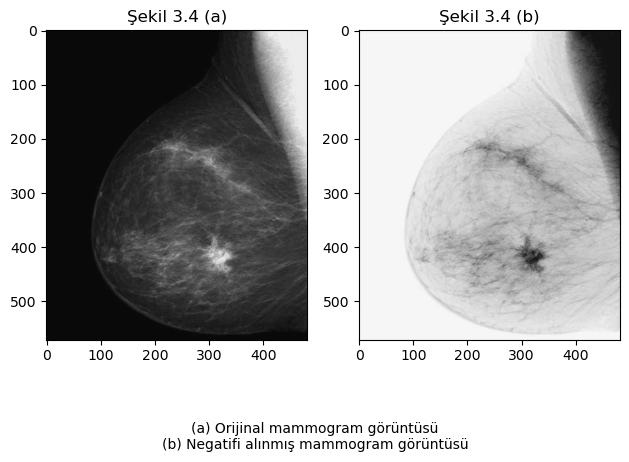

In [5]:
if __name__ == "__main__":
    originalImage = "Fig0304(a)(breast_digital_Xray).pgm"
    negativeImage = 'Negative_Fig0304.pgm'
    myImageNegative(originalImage, negativeImage)
    
    title = "Şekil 3.4 (a)"
    titleOther = "Şekil 3.4 (b)"
    description = "(a) Orijinal mammogram görüntüsü\n(b) Negatifi alınmış mammogram görüntüsü"
    myPGMDisplayDouble(originalImage, negativeImage, title, titleOther, description)

Aşağıdaki kod bloğunda log transformation fonksiyonu tanımlanmıştır.

In [6]:
def myLogTransform(inputFile, outputFile, c):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile) # görüntü okunarak veriler çekilir

    # Log transformasyonu gerçekleştirilir:
    logTransformedIntensity = b""
    for pixel in receivedIntensity:
        logTransformedPixel = round(myLog(pixel + 1) * c)
        logTransformedIntensity += bytes([logTransformedPixel])

    mypgmwrite(outputFile, kVal, header, comment, width, height, logTransformedIntensity) # işlenen görüntü yazdırılır

def myLog(input):
    # math kütüphanesini import etmemek amacıyla 10 tabanında log alan fonksiyon
    if input <= 0:
        raise ValueError("Input pozitif olmak zorundadır!")
    log = 0
    while input > 1:
        input /= 2
        log += 1

    return log
    

Aşağıdaki kod bloğunda main fonksiyonu yer almaktadır. Figure 3.5 Fourier spektrum görüntüsü okundu, log transformu c=1 için gerçekleştirildi; elde edilen şekiller açıklandı.

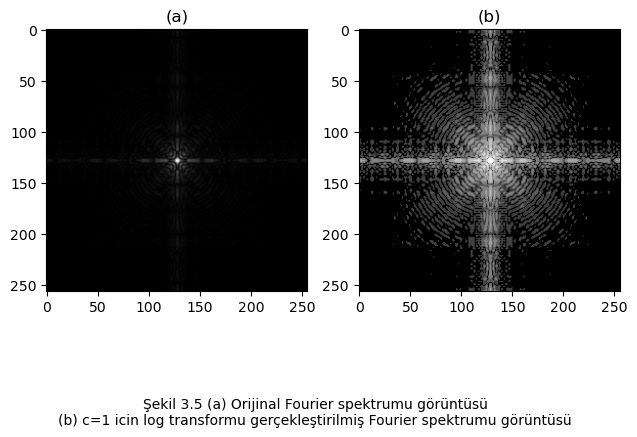

In [7]:
if __name__ == "__main__":
    originalImage = "Fig0305(a)(DFT_no_log).pgm"
    logTransformedImage = 'LogTransform_Fig0305.pgm'
    c = 1
    myLogTransform(originalImage, logTransformedImage, c)
    
    title = "(a)"
    titleOther = "(b)"
    description = "Şekil 3.5 (a) Orijinal Fourier spektrumu görüntüsü\n(b) c=1 icin log transformu gerçekleştirilmiş Fourier spektrumu görüntüsü"
    myPGMDisplayDouble(originalImage, logTransformedImage, title, titleOther, description)

Aşağındaki kod bloğunda gamma correction fonksiyonu yer almaktadır.

In [8]:
def myGammaCorrection(inputFile, outputFile, c, gamma):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile) # görüntü okunarak veriler çekilir

    # Alınan intensity elemanlarına gamma correction uygulanır:
    correctedIntensity = [c * (x ** gamma) for x in receivedIntensity]

    # 0-255 arasına map'lenir
    minIntensity = min(correctedIntensity)
    maxIntensity = max(correctedIntensity)
    normalizedIntensity = [(255 * (x - minIntensity) / (maxIntensity - minIntensity)) for x in correctedIntensity]

    # Gamma Correction uygulanıp normalize edilen elemanlar Byte'ye convert edilir
    gammaCorrectedIntensityBytes = bytes(int(x) for x in normalizedIntensity)

    mypgmwrite(outputFile, kVal, header, comment, width, height, gammaCorrectedIntensityBytes) # işlenen görüntü yazdırılır

Aşağıdaki kod bloğunda main fonksiyonu yer almaktadır. Figure 3.8 MRI okundu, gamma correction c=1 ve sırasıyla gamma=0.6, 0.4 ve 0.3 için kontrast düzenlemesi gerçekleştirildi; elde edilen şekiller açıklandı.

In [9]:
if __name__ == "__main__":
    originalImage = "Fig0308(a)(fractured_spine).pgm"
    c = 1

    gamma = 0.6
    gamma06Image = 'gamma06_Fig0308.pgm'
    myGammaCorrection(originalImage, gamma06Image, c, gamma)
    
    gamma = 0.4
    gamma04Image = 'gamma04_Fig0308.pgm'
    myGammaCorrection(originalImage, gamma04Image, c, gamma)

    gamma = 0.3
    gamma03Image = 'gamma03_Fig0308.pgm'
    myGammaCorrection(originalImage, gamma03Image, c, gamma)


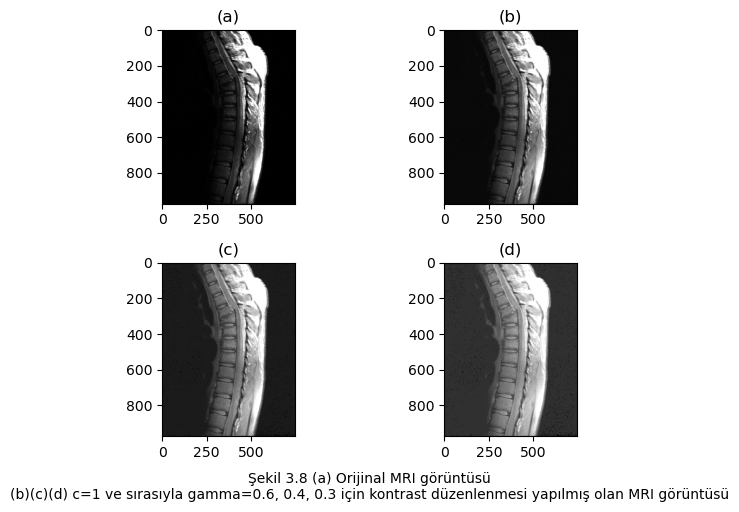

In [10]:
if __name__ == "__main__":
    title1 = "(a)"
    title2 = "(b)"
    title3 = "(c)"
    title4 = "(d)"
    description = "Şekil 3.8 (a) Orijinal MRI görüntüsü\n(b)(c)(d) c=1 ve sırasıyla gamma=0.6, 0.4, 0.3 için kontrast düzenlenmesi yapılmış olan MRI görüntüsü"
    myPGMDisplayQuadra(originalImage, gamma06Image, gamma04Image, gamma03Image, title1, title2, title3, title4, description)

Aşağındaki kod bloğunda görüntü yumuşatma fonksiyonu yer almaktadır.

Derste değinildiği gibi iç içe döngü oluşturarak maske görüntüye uygulandı. Benim için en zorlayıcı kısım bu fonksiyonun beklendiği gibi çalışması oldu.

In [11]:
def myImageCorrelation(inputFile, outputFile, m):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile) # görüntü okunarak veriler çekilir

    # Correlation gerçekleştirilir:
    correlatedIntensity = []
    for y in range(height):
        for x in range(width):
            correlatedPixel = 0
            for i in range(len(m)):
                for j in range(len(m[0])):
                    if 0 <= x + j < width and 0 <= y + i < height:
                        correlatedPixel += receivedIntensity[(y + i) * width + (x + j)] * m[i][j]

            # Yumuşatılan pixel array'a yazılır:
            correlatedPixel /= (2 * len(m) // 2 + 1) ** 2
            correlatedIntensity.append(round(correlatedPixel))

    # Array byte'ye convert edilir:
    correlatedIntensityBytes = bytes(correlatedIntensity)

    mypgmwrite(outputFile, kVal, header, comment, width, height, correlatedIntensityBytes) # işlenen görüntü yazdırılır


Aşağıdaki kod bloğunda main fonksiyonu yer almaktadır. Figure 3.33 görüntüsü okundu, görüntü yumuşatması gerçekleştirildi; elde edilen şekiller açıklandı.

In [12]:
if __name__ == "__main__":
    originalImage = "Fig0333(a)(test_pattern_blurring_orig).pgm"

    mask = [1, 1, 1]
    
    m = [mask]
    n = 3
    m = m*n
    mask3Image = 'mask3_Fig0333.pgm'
    myImageCorrelation(originalImage, mask3Image, m)
    
    m = [mask]
    n = 5
    m = m*n
    mask5Image = 'mask5_Fig0333.pgm'
    myImageCorrelation(originalImage, mask5Image, m)

    m = [mask]
    n = 9
    m = m*n
    mask9Image = 'mask9_Fig0333.pgm'
    myImageCorrelation(originalImage, mask9Image, m)

    m = [mask]
    n = 15
    m = m*n
    mask15Image = 'mask15_Fig0333.pgm'
    myImageCorrelation(originalImage, mask15Image, m)

    m = [mask]
    n = 35
    m = m*n
    mask35Image = 'mask35_Fig0333.pgm'
    myImageCorrelation(originalImage, mask35Image, m)

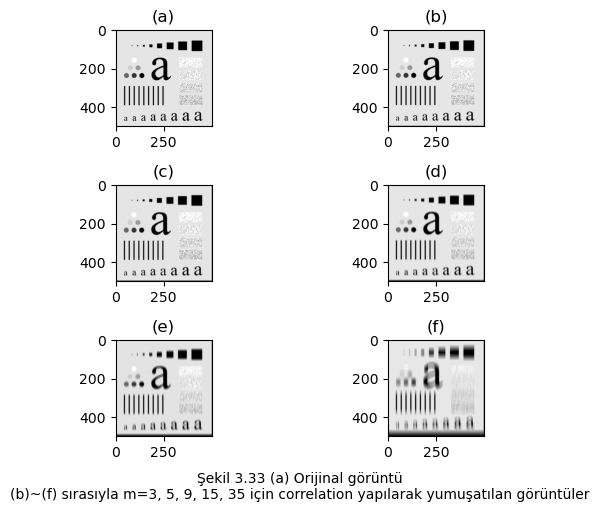

In [13]:
if __name__ == "__main__":
    title1 = "(a)"
    title2 = "(b)"
    title3 = "(c)"
    title4 = "(d)"
    title5 = "(e)"
    title6 = "(f)"
    description = "Şekil 3.33 (a) Orijinal görüntü\n(b)~(f) sırasıyla m=3, 5, 9, 15, 35 için correlation yapılarak yumuşatılan görüntüler"
    myPGMDisplayHexa(originalImage, mask3Image, mask5Image, mask9Image, mask15Image, mask35Image, title1, title2, title3, title4, title5, title6, description)

Aşağındaki kod bloğunda averaging mask yöntemiyle impulse noise tipindeki gürültüyü gideren fonksiyon yer almaktadır.

In [14]:
def myAveragingMask(inputFile, outputFile, m):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile)  # görüntü okunarak veriler çekilir

    # Averaging Mask yöntemiyle gürültü giderilmesi işlemi:
    averagingMaskedIntensity = []
    for y in range(height):
        for x in range(width):
            averagingMaskedPixel = 0
            for i in range(len(m) // 2, len(m) // 2 + 1):
                for j in range(len(m[0]) // 2, len(m[0]) // 2 + 1):
                    if 0 <= x + j < width and 0 <= y + i < height:
                        averagingMaskedPixel += receivedIntensity[(y + i) * width + (x + j)] * m[i + len(m) // 2][j + len(m[0]) // 2]

            # Gürültüsü giderilen pixel array'a yazılır, 0-255 arasında değerlendirilir:
            averagingMaskedPixel = max(0, min(255, round(averagingMaskedPixel)))
            averagingMaskedIntensity.append(averagingMaskedPixel)

    # Array byte'ye convert edilir:
    averagingMaskedIntensityBytes = bytes(averagingMaskedIntensity)

    mypgmwrite(outputFile, kVal, header, comment, width, height, averagingMaskedIntensityBytes)  # işlenen görüntü yazdırılır


Aşağındaki kod bloğunda median filter yöntemiyle impulse noise tipindeki gürültüyü gideren fonksiyon yer almaktadır.

In [15]:
def myMedianFilter(inputFile, outputFile, m):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile)  # görüntü okunarak veriler çekilir

    # Median Filter yöntemiyle gürültü giderilmesi işlemi:
    medianFilteredIntensity = []
    for y in range(height):
        for x in range(width):
            medianFilteredPixel = []
            for i in range(-len(m) // 2, len(m) // 2 + 1):
                for j in range(-len(m[0]) // 2, len(m[0]) // 2 + 1):
                    if 0 <= x + j < width and 0 <= y + i < height:
                        medianFilteredPixel.append(receivedIntensity[(y + i) * width + (x + j)] * m[i + len(m) // 2][j + len(m[0]) // 2])

            # Gürültüsü giderilen pixel array'a yazılır:
            medianFilteredPixel.sort()
            medianFilteredIntensity.append(medianFilteredPixel[len(medianFilteredPixel) // 2])

    # Array byte'ye convert edilir:
    medianFilteredIntensityBytes = bytes(medianFilteredIntensity)

    mypgmwrite(outputFile, kVal, header, comment, width, height, medianFilteredIntensityBytes)  # işlenen görüntü yazdırılır


Aşağıdaki kod bloğunda main fonksiyonu yer almaktadır. Figure 3.35 görüntüsü okundu, gürültü giderilmesi averaging masking ve median filtering yöntemleriyle gerçekleştirildi; elde edilen şekiller açıklandı.

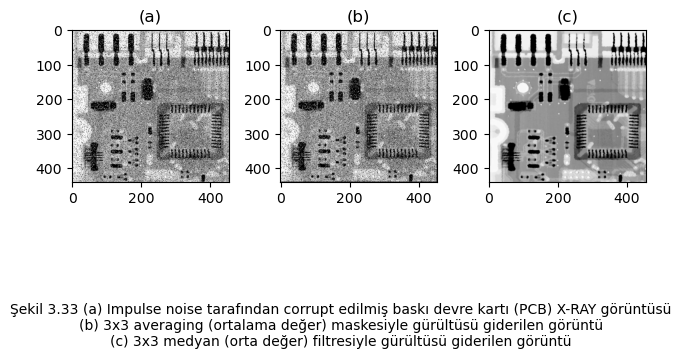

In [16]:
if __name__ == "__main__":
    originalImage = "Fig0335(a)(ckt_board_saltpep_prob_pt05).pgm"
    
    mask = [1, 1, 1]
    m = [mask]
    n = 3
    m = m*n

    averagingMask = "averagingMask_Fig0335.pgm"
    myAveragingMask(originalImage, averagingMask, m)
    
    medianFilter = "medianFilter_Fig0335.pgm"
    myMedianFilter(originalImage, medianFilter, m)

    title1 = "(a)"
    title2 = "(b)"
    title3 = "(c)"
    description = "Şekil 3.33 (a) Impulse noise tarafından corrupt edilmiş baskı devre kartı (PCB) X-RAY görüntüsü\n(b) 3x3 averaging (ortalama değer) maskesiyle gürültüsü giderilen görüntü\n(c) 3x3 medyan (orta değer) filtresiyle gürültüsü giderilen görüntü"
    myPGMDisplayTriple(originalImage, averagingMask, medianFilter, title1, title2, title3, description)